In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
station_df = pd.read_sql("SELECT * FROM station",conn)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# The latest date in database is 8/23/2017, so a year from then
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, func.max(Measurement.prcp)]
precipitation_results = session.query(*sel).filter(Measurement.date > query_date)\
.group_by(Measurement.date).order_by(Measurement.date).all()
precipitation_results

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

<Figure size 1440x1440 with 0 Axes>

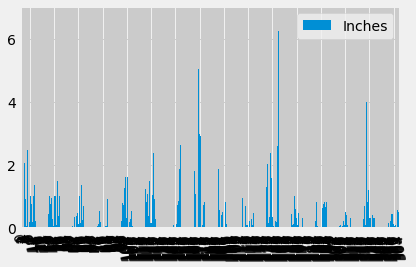

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_results, columns= ["Date", "Inches"])

#delete rows without data
precipitation_df.dropna(subset=['Inches'], inplace=True)

# Sort the dataframe by date
precipitation_df.set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,20))
precipitation_df.plot.bar(y='Inches',rot=100)
#plt.xticks(np.arange(10), rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

In [16]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station)).all()
stations

[(9)]

In [53]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [Measurement.station, func.count(Measurement.station)]

active_stations= session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(active_stations)

#identify the station with the highest number of observations
top_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
top_station

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


('USC00519281', 2772)

In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
station_data = session.query(*sel).filter(Measurement.station=="USC00519281").all()
station_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [95]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

sel = [Measurement.station, Measurement.date, Measurement.tobs, func.avg(Measurement.tobs)]

station_results = session.query(*sel).filter(Measurement.date>query_date).filter(Measurement.station == "USC00519281")\
.group_by(Measurement.tobs).all()
station_results

[('USC00519281', '2017-02-02', 59.0, 59.0),
 ('USC00519281', '2017-02-03', 60.0, 60.0),
 ('USC00519281', '2017-02-25', 61.0, 61.0),
 ('USC00519281', '2016-12-15', 62.0, 62.0),
 ('USC00519281', '2016-11-07', 63.0, 63.0),
 ('USC00519281', '2017-01-03', 64.0, 64.0),
 ('USC00519281', '2016-12-13', 65.0, 65.0),
 ('USC00519281', '2016-12-12', 66.0, 66.0),
 ('USC00519281', '2016-11-10', 67.0, 67.0),
 ('USC00519281', '2016-11-09', 68.0, 68.0),
 ('USC00519281', '2016-12-07', 69.0, 69.0),
 ('USC00519281', '2016-11-08', 70.0, 70.0),
 ('USC00519281', '2016-10-10', 71.0, 71.0),
 ('USC00519281', '2016-10-09', 72.0, 72.0),
 ('USC00519281', '2016-08-28', 73.0, 73.0),
 ('USC00519281', '2016-09-07', 74.0, 74.0),
 ('USC00519281', '2016-08-27', 75.0, 75.0),
 ('USC00519281', '2016-09-12', 76.0, 76.0),
 ('USC00519281', '2016-08-24', 77.0, 77.0),
 ('USC00519281', '2016-08-29', 78.0, 78.0),
 ('USC00519281', '2016-09-09', 79.0, 79.0),
 ('USC00519281', '2016-08-25', 80.0, 80.0),
 ('USC00519281', '2017-03-11', 8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A0E21C2E8>]],
      dtype=object)

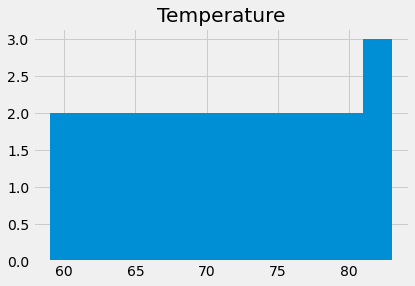

In [96]:
# and plot the results as a histogram

#save query results as df
station_df = pd.DataFrame(station_results, columns = ["Station","Date", "Temperature","Count"])
clean_df = station_df[["Temperature","Count"]]
clean_df.hist(column="Temperature",bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
